In [7]:
#Import Libraries

import tensorflow as tf
import seaborn as sns
import numpy as np

from PIL import Image
import glob
from collections import defaultdict
from tensorflow import keras
from tensorflow.keras import layers


In [8]:
# Size of the image divide by 4 (94*4=376, 125*4=500)
IMG_SIZE = (94, 125)

def pixels_from_path(file_path):
    print("Processing:", file_path)  
    im = Image.open(file_path).convert('RGB')
    im = im.resize(IMG_SIZE)
    np_im = np.array(im)
    # matrix of pixel RGB values
    return np_im




In [9]:
import os

folder_path = "Lions-Tigers/Lion/"
new_label = "lion"

# Get a list of all files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Rename and label the images
for i, image_file in enumerate(image_files, start=1):
    _, ext = os.path.splitext(image_file)
    new_name = f"{new_label}{i}{ext}"
    old_path = os.path.join(folder_path, image_file)
    new_path = os.path.join(folder_path, new_name)
    os.rename(old_path, new_path)

print("Images labeled and renamed successfully.")

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'Lions-Tigers/Lion/lion100.jpg' -> 'Lions-Tigers/Lion/lion2.jpg'

In [ ]:
folder_path = "Lions-Tigers/Tiger/"
new_label = "Tiger"

# Get a list of all files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Rename and label the images
for i, image_file in enumerate(image_files, start=1):
    _, ext = os.path.splitext(image_file)
    new_name = f"{new_label}{i}{ext}"
    old_path = os.path.join(folder_path, image_file)
    new_path = os.path.join(folder_path, new_name)
    os.rename(old_path, new_path)

print("Images labeled and renamed successfully.")

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'Lions-Tigers/Tiger/Tiger10.jpg' -> 'Lions-Tigers/Tiger/Tiger2.jpg'

In [10]:
#see if the files are being open
glob.glob('Lions-Tigers/Lion/*')

['Lions-Tigers/Lion\\lion1.png',
 'Lions-Tigers/Lion\\lion100.jpg',
 'Lions-Tigers/Lion\\lion101.jpg',
 'Lions-Tigers/Lion\\lion102.png',
 'Lions-Tigers/Lion\\lion103.jpg',
 'Lions-Tigers/Lion\\lion104.jpg',
 'Lions-Tigers/Lion\\lion105.jpg',
 'Lions-Tigers/Lion\\lion106.jpg',
 'Lions-Tigers/Lion\\lion107.jpg',
 'Lions-Tigers/Lion\\lion108.jpg',
 'Lions-Tigers/Lion\\lion109.jpg',
 'Lions-Tigers/Lion\\lion11.jpg',
 'Lions-Tigers/Lion\\lion110.png',
 'Lions-Tigers/Lion\\lion111.jpg',
 'Lions-Tigers/Lion\\lion112.jpg',
 'Lions-Tigers/Lion\\lion113.png',
 'Lions-Tigers/Lion\\lion114.jpg',
 'Lions-Tigers/Lion\\lion115.jpg',
 'Lions-Tigers/Lion\\lion116.png',
 'Lions-Tigers/Lion\\lion117.jpg',
 'Lions-Tigers/Lion\\lion118.png',
 'Lions-Tigers/Lion\\lion119.jpg',
 'Lions-Tigers/Lion\\lion12.png',
 'Lions-Tigers/Lion\\lion120.png',
 'Lions-Tigers/Lion\\lion121.jpg',
 'Lions-Tigers/Lion\\lion122.png',
 'Lions-Tigers/Lion\\lion123.jpg',
 'Lions-Tigers/Lion\\lion124.jpg',
 'Lions-Tigers/Lion\\lio

In [11]:

#coount the sabes first 1,000
shape_counts = defaultdict(int)
for i, lion in enumerate(glob.glob('Lions-Tigers/Lion/*')[:1000]):
    if i%100==0:
        print(i)
    img_shape = pixels_from_path(lion).shape
    shape_counts[str(img_shape)]= shape_counts[str(img_shape)]+ 1

0
Processing: Lions-Tigers/Lion\lion1.png
Processing: Lions-Tigers/Lion\lion100.jpg
Processing: Lions-Tigers/Lion\lion101.jpg
Processing: Lions-Tigers/Lion\lion102.png
Processing: Lions-Tigers/Lion\lion103.jpg
Processing: Lions-Tigers/Lion\lion104.jpg
Processing: Lions-Tigers/Lion\lion105.jpg
Processing: Lions-Tigers/Lion\lion106.jpg
Processing: Lions-Tigers/Lion\lion107.jpg
Processing: Lions-Tigers/Lion\lion108.jpg
Processing: Lions-Tigers/Lion\lion109.jpg
Processing: Lions-Tigers/Lion\lion11.jpg
Processing: Lions-Tigers/Lion\lion110.png
Processing: Lions-Tigers/Lion\lion111.jpg
Processing: Lions-Tigers/Lion\lion112.jpg
Processing: Lions-Tigers/Lion\lion113.png
Processing: Lions-Tigers/Lion\lion114.jpg
Processing: Lions-Tigers/Lion\lion115.jpg
Processing: Lions-Tigers/Lion\lion116.png
Processing: Lions-Tigers/Lion\lion117.jpg
Processing: Lions-Tigers/Lion\lion118.png
Processing: Lions-Tigers/Lion\lion119.jpg
Processing: Lions-Tigers/Lion\lion12.png
Processing: Lions-Tigers/Lion\lion12

In [12]:
# Get a list of images in the 'train' directory
file_list = glob.glob('Lions-Tigers/Lion/*' + '/*.png')

# Process each image using the pixels_from_path() function
for file_path in file_list:
    image_pixels = pixels_from_path(file_path)
    
    # Check if the function returned anything
    if image_pixels is not None:
        # Print the shape of the array to verify if the image data is present
        print("Shape of the image array:", image_pixels.shape)
    else:
        print("The function did not return any data.")

In [13]:
shape_items = list(shape_counts.items())
shape_items.sort(key = lambda x: x[1])
shape_items.reverse()

In [14]:
# 10% of the data will automatically be used for validation
validation_size = 0.1
img_size = IMG_SIZE # resize images to be 374x500 (most common shape)
num_channels = 3 # RGB
sample_size = 8192 #We'll use 8192 pictures 

In [16]:
#lenght of dataset
len(glob.glob('Lions-Tigers/Lion/*'))

458

In [17]:
#shape of the pictues heign, with and rgb
pixels_from_path(glob.glob('Lions-Tigers/Lion/*')[5]).shape

Processing: Lions-Tigers/Lion\lion104.jpg


(125, 94, 3)

In [18]:


#Sample 2048 for dogs and 2048 for cats
SAMPLE_SIZE = 400

print("loading training Lions images...")
lion_train_set = np.asarray([pixels_from_path(lion) for lion in glob.glob('Lions-Tigers/Lion/*')[:SAMPLE_SIZE]])
print("loading training Tigers images...")
tiger_train_set = np.asarray([pixels_from_path(tiger) for tiger in glob.glob('Lions-Tigers/Tiger/*')[:SAMPLE_SIZE]])
print("loading training cat images...")
cat_train_set = np.asarray([pixels_from_path(cat) for cat in glob.glob('train/*')[:SAMPLE_SIZE]])
print("loading training dog images...")
dogt_train_set = np.asarray([pixels_from_path(dog) for dog in glob.glob('train/*')[:SAMPLE_SIZE]])


loading training Lions images...
Processing: Lions-Tigers/Lion\lion1.png
Processing: Lions-Tigers/Lion\lion100.jpg
Processing: Lions-Tigers/Lion\lion101.jpg
Processing: Lions-Tigers/Lion\lion102.png
Processing: Lions-Tigers/Lion\lion103.jpg
Processing: Lions-Tigers/Lion\lion104.jpg
Processing: Lions-Tigers/Lion\lion105.jpg
Processing: Lions-Tigers/Lion\lion106.jpg
Processing: Lions-Tigers/Lion\lion107.jpg
Processing: Lions-Tigers/Lion\lion108.jpg
Processing: Lions-Tigers/Lion\lion109.jpg
Processing: Lions-Tigers/Lion\lion11.jpg
Processing: Lions-Tigers/Lion\lion110.png
Processing: Lions-Tigers/Lion\lion111.jpg
Processing: Lions-Tigers/Lion\lion112.jpg
Processing: Lions-Tigers/Lion\lion113.png
Processing: Lions-Tigers/Lion\lion114.jpg
Processing: Lions-Tigers/Lion\lion115.jpg
Processing: Lions-Tigers/Lion\lion116.png
Processing: Lions-Tigers/Lion\lion117.jpg
Processing: Lions-Tigers/Lion\lion118.png
Processing: Lions-Tigers/Lion\lion119.jpg
Processing: Lions-Tigers/Lion\lion12.png
Proce

In [19]:
# Same thing for validation size
valid_size = 50

print("loading validation Lion images...")
Lion_valid_set = np.asarray([pixels_from_path(lion) for lion in glob.glob('Lions-Tigers/Lion/*')[-valid_size:]])
print("loading validation Tiger images...")
Tiger_valid_set = np.asarray([pixels_from_path(tiger) for tiger in glob.glob('Lions-Tigers/Tiger/*')[-valid_size:]])
print("loading validation cat images...")
cat_valid_set = np.asarray([pixels_from_path(cat) for cat in glob.glob('train/*')[-valid_size:]])
print("loading validation dog images...")
dog_valid_set = np.asarray([pixels_from_path(dog) for dog in glob.glob('train/*')[-valid_size:]])


loading validation Lion images...
Processing: Lions-Tigers/Lion\lion54.jpg
Processing: Lions-Tigers/Lion\lion55.jpg
Processing: Lions-Tigers/Lion\lion56.jpg
Processing: Lions-Tigers/Lion\lion57.jpg
Processing: Lions-Tigers/Lion\lion58.jpg
Processing: Lions-Tigers/Lion\lion59.jpg
Processing: Lions-Tigers/Lion\lion6.png
Processing: Lions-Tigers/Lion\lion60.jpg
Processing: Lions-Tigers/Lion\lion61.jpg
Processing: Lions-Tigers/Lion\lion62.png
Processing: Lions-Tigers/Lion\lion63.jpg
Processing: Lions-Tigers/Lion\lion64.png
Processing: Lions-Tigers/Lion\lion65.jpg
Processing: Lions-Tigers/Lion\lion66.jpg
Processing: Lions-Tigers/Lion\lion67.jpg
Processing: Lions-Tigers/Lion\lion68.jpg
Processing: Lions-Tigers/Lion\lion69.jpg
Processing: Lions-Tigers/Lion\lion7.jpg
Processing: Lions-Tigers/Lion\lion70.jpg
Processing: Lions-Tigers/Lion\lion71.jpg
Processing: Lions-Tigers/Lion\lion72.jpg
Processing: Lions-Tigers/Lion\lion73.jpg
Processing: Lions-Tigers/Lion\lion74.jpg
Processing: Lions-Tigers/

In [20]:
# Assuming SAMPLE_SIZE is defined somewhere
x_train = np.concatenate([tiger_train_set, cat_train_set, dogt_train_set, lion_train_set])
labels_train = np.asarray([0 for _ in range(SAMPLE_SIZE)] +  # Tiger
                          [1 for _ in range(SAMPLE_SIZE)] +  # Cat
                          [2 for _ in range(SAMPLE_SIZE)] +  # Dog
                          [3 for _ in range(SAMPLE_SIZE)])   # Lion


'''
x_train = np.concatenate([cat_train_set, dog_train_set])
labels_train = np.asarray([1 for _ in range(SAMPLE_SIZE)]+[0 for _ in range(SAMPLE_SIZE)])
'''

'\nx_train = np.concatenate([cat_train_set, dog_train_set])\nlabels_train = np.asarray([1 for _ in range(SAMPLE_SIZE)]+[0 for _ in range(SAMPLE_SIZE)])\n'

In [21]:
# Assuming valid_size is defined somewhere
x_valid = np.concatenate([Lion_valid_set, Tiger_valid_set, dog_valid_set, cat_valid_set])
labels_valid = np.asarray([0 for _ in range(valid_size)] +    # Lion
                          [1 for _ in range(valid_size)] +    # Tiger
                          [2 for _ in range(valid_size)] +    # Dog
                          [3 for _ in range(valid_size)])     # Cat
'''
x_valid = np.concatenate([cat_valid_set, dog_valid_set])
labels_valid = np.asarray([1 for _ in range(valid_size)]+[0 for _ in range(valid_size)])
'''

'\nx_valid = np.concatenate([cat_valid_set, dog_valid_set])\nlabels_valid = np.asarray([1 for _ in range(valid_size)]+[0 for _ in range(valid_size)])\n'

In [22]:
#size of the train array
x_train.shape

(1600, 125, 94, 3)

In [23]:
labels_train.shape

(1600,)

<h1>Normal Neural Network</h1>
Run of the Mill MLP

In [ ]:

num_classes = 4

# Create Neural Network
total_pixels = img_size[0] * img_size[1] * 3
fc_size = 512

inputs = keras.Input(shape=(img_size[1], img_size[0], 3), name='ani_image')
x = layers.Flatten(name='flattened_img')(inputs)  # Turn image to vector.
x = layers.Dense(fc_size, activation='relu', name='first_layer')(x)
outputs = layers.Dense(num_classes, activation='softmax', name='class')(x)  # Use softmax for multi-class classification

model = keras.Model(inputs=inputs, outputs=outputs)



model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels (32,1)-(32,4) ERROR FIXED
              metrics=['accuracy'])
# Print model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ani_image (InputLayer)      [(None, 125, 94, 3)]      0         
                                                                 
 flattened_img (Flatten)     (None, 35250)             0         
                                                                 
 first_layer (Dense)         (None, 512)               18048512  
                                                                 
 class (Dense)               (None, 4)                 2052      
                                                                 
Total params: 18050564 (68.86 MB)
Trainable params: 18050564 (68.86 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train Model
print('# Fit model on training data')

history = model.fit(x_train, 
                    labels_train,
                    batch_size=32, 
                    shuffle = True, #important since we loaded cats first, dogs second.
                    epochs=10,
                    validation_data=(x_valid, labels_valid))

# Fit model on training data
Epoch 1/10
50/50 [==============================] - 10s 180ms/step - loss: 5019.7998 - accuracy: 0.2744 - val_loss: 529.2885 - val_accuracy: 0.2500
Epoch 2/10
50/50 [==============================] - 9s 171ms/step - loss: 437.6807 - accuracy: 0.3425 - val_loss: 516.2213 - val_accuracy: 0.3100
Epoch 3/10
50/50 [==============================] - 8s 168ms/step - loss: 330.0692 - accuracy: 0.3587 - val_loss: 663.4716 - val_accuracy: 0.2900
Epoch 4/10
50/50 [==============================] - 8s 168ms/step - loss: 347.9572 - accuracy: 0.3738 - val_loss: 451.6622 - val_accuracy: 0.2200
Epoch 5/10
50/50 [==============================] - 9s 170ms/step - loss: 359.8453 - accuracy: 0.3694 - val_loss: 485.0493 - val_accuracy: 0.2650
Epoch 6/10
50/50 [==============================] - 9s 189ms/step - loss: 302.6430 - accuracy: 0.4025 - val_loss: 522.7756 - val_accuracy: 0.2500
Epoch 7/10
50/50 [==============================] - 9s 173ms/step - loss: 408.1670 - accuracy

In [ ]:
#Predictions and Pearson correlation
preds = model.predict(x_valid)
preds = np.asarray([pred[0] for pred in preds])
np.corrcoef(preds, labels_valid)
print(labels_valid)

7/7 [==============================] - 0s 16ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [ ]:
def animal_pic(index):
    return Image.fromarray(x_valid[index])
def cat_index(index):
    return model.predict(np.asarray([x_valid[124]]))[0][0]

In [ ]:
model.save('conv_model_big')

INFO:tensorflow:Assets written to: conv_model_big\assets


INFO:tensorflow:Assets written to: conv_model_big\assets


1/1 [==============================] - 0s 40ms/step
probability of being a cat: 1.0


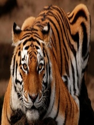

In [ ]:
index = 78
print("probability of being a cat: {}".format(cat_index(index)))
animal_pic(index)

<h1>Single Convolutional Layer</h1>
Second Model

In [ ]:

num_classes = 4
#Create neural network
fc_layer_size = 128
img_size = IMG_SIZE

#Convolutional Layers
conv_inputs = keras.Input(shape=(img_size[1], img_size[0],3), name='ani_image')
conv_layer = layers.Conv2D(24, kernel_size=3, activation='relu')(conv_inputs)
conv_layer = layers.MaxPool2D(pool_size=(2,2))(conv_layer)
conv_x = layers.Flatten(name = 'flattened_features')(conv_layer) #turn image to vector.

conv_x = layers.Dense(fc_layer_size, activation='relu', name='first_layer')(conv_x)
conv_x = layers.Dense(fc_layer_size, activation='relu', name='second_layer')(conv_x)
conv_outputs = layers.Dense(num_classes, activation='softmax', name='class')(conv_x)  # softmax for multi-class
#Activation equations
"""conv_x = layers.Dense(fc_layer_size, activation='relu', name='first_layer')(conv_x)
conv_x = layers.Dense(fc_layer_size, activation='relu', name='second_layer')(conv_x)
conv_outputs = layers.Dense(1, activation='sigmoid', name='class')(conv_x)"""

conv_model = keras.Model(inputs=conv_inputs, outputs=conv_outputs)

In [ ]:
# Adam Optimizer
"""customAdam = keras.optimizers.Adam(lr=1e-6)
conv_model.compile(optimizer=customAdam,  # Optimizer
              # Loss function to minimize
              loss="sparse_categorical_crossentropy",
              # List of metrics to monitor
              metrics=["sparse_categorical_crossentropy","mean_squared_error"])"""


customAdam = keras.optimizers.Adam(lr=1e-6)
conv_model.compile(optimizer=customAdam,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])



In [ ]:
conv_model.compile(optimizer=customAdam,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])


In [ ]:
#Training model 5 epochs
print('# Fit model on training data')

history = conv_model.fit(x_train, 
                    labels_train, #we pass it th labels
                    #If the model is taking forever to train, make this bigger
                    #If it is taking forever to load for the first epoch, make this smaller
                    batch_size=32, 
                    shuffle = True,
                    epochs=15,
                    validation_data=(x_valid, labels_valid))

# Fit model on training data
Epoch 1/15
50/50 [==============================] - 6s 124ms/step - loss: 0.8149 - accuracy: 0.7019 - val_loss: 4.4406 - val_accuracy: 0.1300
Epoch 2/15
50/50 [==============================] - 6s 117ms/step - loss: 0.7303 - accuracy: 0.6800 - val_loss: 4.3447 - val_accuracy: 0.1450
Epoch 3/15
50/50 [==============================] - 6s 113ms/step - loss: 0.7161 - accuracy: 0.6806 - val_loss: 4.7302 - val_accuracy: 0.2200
Epoch 4/15
50/50 [==============================] - 6s 120ms/step - loss: 0.6921 - accuracy: 0.6850 - val_loss: 4.3363 - val_accuracy: 0.1450
Epoch 5/15
50/50 [==============================] - 6s 119ms/step - loss: 0.6647 - accuracy: 0.6931 - val_loss: 4.4246 - val_accuracy: 0.1600
Epoch 6/15
50/50 [==============================] - 6s 120ms/step - loss: 0.6551 - accuracy: 0.6744 - val_loss: 4.4357 - val_accuracy: 0.1800
Epoch 7/15
50/50 [==============================] - 6s 119ms/step - loss: 0.6218 - accuracy: 0.6963 - val_loss: 4.2533 

In [ ]:
print(preds.mean())
print(preds[labels_valid == 0].mean())
print(preds[labels_valid == 1].mean())

0.30057484
0.20180033
0.6257148


In [ ]:
#Threshold stops working after the fifth one
cat_quantity = sum(labels_valid)

for i in range(1, 10):
    print('threshold :' + str(.1 * i))
    # Select predictions above the threshold
    selected_preds = labels_valid[preds > .1 * i]
    if selected_preds.shape[0] > 0:  # Check if the array is not empty
        print(sum(selected_preds) / selected_preds.shape[0])
    else:
        print("No predictions above the threshold.")

threshold :0.1
1.4521739130434783
threshold :0.2
1.3452380952380953
threshold :0.30000000000000004
1.3181818181818181
threshold :0.4
1.3157894736842106
threshold :0.5
1.2352941176470589
threshold :0.6000000000000001
1.15
threshold :0.7000000000000001
1.1142857142857143
threshold :0.8
1.064516129032258
threshold :0.9
0.9655172413793104


In [ ]:
#Predictions and Pearson correlation
preds = conv_model.predict(x_valid)
preds = np.asarray([pred[0] for pred in preds])
np.corrcoef(preds, labels_valid)

7/7 [==============================] - 0s 22ms/step


array([[ 1.        , -0.17211563],
       [-0.17211563,  1.        ]])

In [ ]:
def animal_pic(index):
    return Image.fromarray(x_valid[index])
def tiger_index(index):
    return conv_model.predict(np.asarray([x_valid[124]]))[0][0]

In [ ]:
conv_model.save('conv_model_big')

INFO:tensorflow:Assets written to: conv_model_big\assets


INFO:tensorflow:Assets written to: conv_model_big\assets


1/1 [==============================] - 0s 23ms/step
probability of being a tiger: 0.20254170894622803


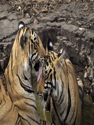

In [ ]:
index = 87
print("probability of being a tiger: {}".format(tiger_index(index)))
animal_pic(index)

<Axes: >

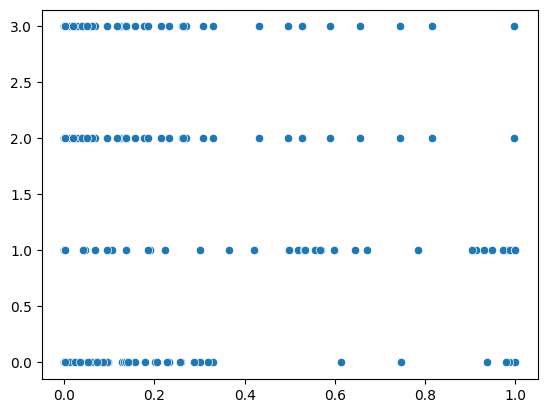

In [ ]:
#Graph
sns.scatterplot(x= preds, y= labels_valid)

In [ ]:
#Threshold
cat_quantity = sum(labels_valid)

for i in range(1,10):
    print('threshold :'+str(.1*i))
    print(sum(labels_valid[preds > .1*i])/labels_valid[preds > .1*i].shape[0])

threshold :0.1
1.4521739130434783
threshold :0.2
1.3452380952380953
threshold :0.30000000000000004
1.3181818181818181
threshold :0.4
1.3157894736842106
threshold :0.5
1.2352941176470589
threshold :0.6000000000000001
1.15
threshold :0.7000000000000001
1.1142857142857143
threshold :0.8
1.064516129032258
threshold :0.9
0.9655172413793104


In [ ]:
#Prediction 50% coin toss
print(preds.mean())
print(preds[labels_valid == 0].mean())
print(preds[labels_valid == 1].mean())

0.30057484
0.20180033
0.6257148


<h1>Two convolutional Layers</h1>
Bigger Convolutional Model

In [27]:
#Creating the model
fc_layer_size = 256
img_size = IMG_SIZE
num_classes = 4
#Convolutional layers with 48 kernel each (more neurons)
conv_inputs = keras.Input(shape=(img_size[1], img_size[0],3), name='ani_image')
conv_layer = layers.Conv2D(48, kernel_size=3, activation='relu')(conv_inputs)
conv_layer = layers.MaxPool2D(pool_size=(2,2))(conv_layer)
#Second layer
conv_layer = layers.Conv2D(48, kernel_size=3, activation='relu')(conv_layer)
conv_layer = layers.MaxPool2D(pool_size=(2,2))(conv_layer)
conv_x = layers.Flatten(name = 'flattened_features')(conv_layer) #turn image to vector.
#Activation 
conv_x = layers.Dense(fc_layer_size, activation='relu', name='first_layer')(conv_x)
conv_x = layers.Dense(fc_layer_size, activation='relu', name='second_layer')(conv_x)
conv_outputs = layers.Dense(num_classes, activation='softmax', name='class')(conv_x)  # softmax for multi-class
#Activation equations
conv_model = keras.Model(inputs=conv_inputs, outputs=conv_outputs)

In [28]:
#Adam Optimizer
customAdam = keras.optimizers.Adam(lr=1e-6)
conv_model.compile(optimizer=customAdam,  # Optimizer
              # Loss function to minimize
              loss="sparse_categorical_crossentropy",
              # List of metrics to monitor
              metrics=["accuracy","sparse_categorical_crossentropy","mean_squared_error"])

In [50]:
##Train the model 15 epoch this time
print('# Fit model on training data')
history = conv_model.fit(x_train, 
                    labels_train, #we pass it th labels
                    #If the model is taking forever to train, make this bigger
                    #If it is taking forever to load for the first epoch, make this smaller
                    batch_size=64, 
                    shuffle = True,
                    epochs=4,
                    validation_data=(x_valid, labels_valid))

# Fit model on training data
Epoch 1/4
25/25 [==============================] - 8s 306ms/step - loss: 0.3863 - accuracy: 0.6963 - sparse_categorical_crossentropy: 0.3863 - mean_squared_error: 2.9370 - val_loss: 5.9406 - val_accuracy: 0.2850 - val_sparse_categorical_crossentropy: 5.9406 - val_mean_squared_error: 2.9253
Epoch 2/4
25/25 [==============================] - 8s 300ms/step - loss: 0.3780 - accuracy: 0.6881 - sparse_categorical_crossentropy: 0.3780 - mean_squared_error: 2.9375 - val_loss: 4.3354 - val_accuracy: 0.2300 - val_sparse_categorical_crossentropy: 4.3354 - val_mean_squared_error: 2.9115
Epoch 3/4
25/25 [==============================] - 8s 319ms/step - loss: 0.3765 - accuracy: 0.7063 - sparse_categorical_crossentropy: 0.3765 - mean_squared_error: 2.9367 - val_loss: 5.3077 - val_accuracy: 0.2750 - val_sparse_categorical_crossentropy: 5.3077 - val_mean_squared_error: 2.9208
Epoch 4/4
25/25 [==============================] - 8s 310ms/step - loss: 0.3792 - accuracy: 0.6906

In [51]:
#Pearson Correlation and Predictions
preds = conv_model.predict(x_valid)
preds = np.asarray([pred[0] for pred in preds])
np.corrcoef(preds, labels_valid)

7/7 [==============================] - 0s 35ms/step


array([[ 1.        , -0.08040155],
       [-0.08040155,  1.        ]])

<Axes: >

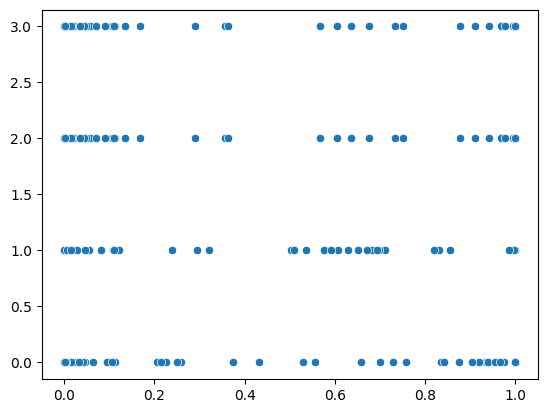

In [52]:
sns.scatterplot(x= preds, y= labels_valid)

In [53]:
#49% Accuracy
print(preds.mean())
print(preds[labels_valid == 0].mean())
print(preds[labels_valid == 1].mean())

0.416021
0.44983676
0.45663166


In [55]:
#Threshold stops working after the fifth one
cat_quantity = sum(labels_valid)

for i in range(1, 10):
    print('threshold :' + str(.1 * i))
    # Select predictions above the threshold
    selected_preds = labels_valid[preds > .1 * i]
    if selected_preds.shape[0] > 0:  # Check if the array is not empty
        print(sum(selected_preds) / selected_preds.shape[0])
    else:
        print("No predictions above the threshold.")


threshold :0.1
1.4297520661157024
threshold :0.2
1.3461538461538463
threshold :0.30000000000000004
1.4
threshold :0.4
1.3707865168539326
threshold :0.5
1.3863636363636365
threshold :0.6000000000000001
1.4177215189873418
threshold :0.7000000000000001
1.4126984126984128
threshold :0.8
1.3928571428571428
threshold :0.9
1.4583333333333333


In [ ]:
def animal_pic(index):
    return Image.fromarray(x_valid[index])
def tiger_index(index):
    return conv_model.predict(np.asarray([x_valid[124]]))[0][0]


In [ ]:
#Save model
conv_model.save('conv_model_big')

NameError: name 'conv_model' is not defined

1/1 [==============================] - 0s 19ms/step
probability of being a tiger: 0.2696165144443512


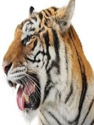

In [ ]:
#Test model
#Not a cat it says it's not a cat but its a coin toss
index = 90
print("probability of being a tiger: {}".format(tiger_index(index)))
animal_pic(index)

In [ ]:
#Prediction score
conv_model.predict(np.asarray([x_valid[124]]))[0][0]

1/1 [==============================] - 0s 40ms/step


0.21438384

In [ ]:
#Save model
big_model = keras.models.load_model('conv_model_big')

<h1>2 Convolutional Layer 128 Kernels</h1>
Biggest model

In [ ]:
#Creat nueral network
fc_layer_size = 256
img_size = IMG_SIZE
# Convolutional layers 128 kernels
conv_inputs = keras.Input(shape=(img_size[1], img_size[0],3), name='ani_image')
conv_layer = layers.Conv2D(128, kernel_size=3, activation='relu')(conv_inputs)
conv_layer = layers.MaxPool2D(pool_size=(2,2))(conv_layer)
#Second layer
conv_layer = layers.Conv2D(128, kernel_size=3, activation='relu')(conv_layer)
conv_layer = layers.MaxPool2D(pool_size=(2,2))(conv_layer)
conv_x = layers.Flatten(name = 'flattened_features')(conv_layer) #turn image to vector.
#Activation
conv_x = layers.Dense(fc_layer_size, activation='relu', name='first_layer')(conv_x)
conv_x = layers.Dense(fc_layer_size, activation='relu', name='second_layer')(conv_x)
conv_outputs = layers.Dense(num_classes, activation='softmax', name='class')(conv_x)  # softmax for multi-class

huge_conv_model = keras.Model(inputs=conv_inputs, outputs=conv_outputs)

In [ ]:
#Optimizer
customAdam = keras.optimizers.Adam(lr=1e-6)
huge_conv_model.compile(optimizer=customAdam,  # Optimizer
              # Loss function to minimize
              loss="sparse_categorical_crossentropy",
              # List of metrics to monitor
              metrics=["sparse_categorical_crossentropy","mean_squared_error", "accuracy"])

In [ ]:
#Train model 5 epochs or it takes forever
print('# Fit model on training data')
history = huge_conv_model.fit(x_train, 
                    labels_train, #we pass it th labels
                    #If the model is taking forever to train, make this bigger
                    #If it is taking forever to load for the first epoch, make this smaller
                    batch_size=64, 
                    shuffle = True,
                    epochs=5,
                    validation_data=(x_valid, labels_valid))

# Fit model on training data
Epoch 1/5
25/25 [==============================] - 27s 1s/step - loss: 1.1302 - sparse_categorical_crossentropy: 1.1302 - mean_squared_error: 2.8546 - accuracy: 0.4512 - val_loss: 2.1005 - val_sparse_categorical_crossentropy: 2.1005 - val_mean_squared_error: 2.8497 - val_accuracy: 0.2700
Epoch 2/5
25/25 [==============================] - 26s 1s/step - loss: 1.0128 - sparse_categorical_crossentropy: 1.0128 - mean_squared_error: 2.8687 - accuracy: 0.4769 - val_loss: 2.3015 - val_sparse_categorical_crossentropy: 2.3015 - val_mean_squared_error: 2.8545 - val_accuracy: 0.2250
Epoch 3/5
25/25 [==============================] - 25s 1s/step - loss: 0.8614 - sparse_categorical_crossentropy: 0.8614 - mean_squared_error: 2.8835 - accuracy: 0.5412 - val_loss: 2.3613 - val_sparse_categorical_crossentropy: 2.3613 - val_mean_squared_error: 2.8597 - val_accuracy: 0.2350
Epoch 4/5
25/25 [==============================] - 26s 1s/step - loss: 0.7878 - sparse_categorical_cross

In [ ]:
#Correlation Scores and Predictions
preds = huge_conv_model.predict(x_valid)
preds = np.asarray([pred[0] for pred in preds])
np.corrcoef(preds, labels_valid)

7/7 [==============================] - 1s 121ms/step


array([[ 1.        , -0.02936602],
       [-0.02936602,  1.        ]])

In [ ]:
#Slight Improvment
#50.13%  accuracy
print(preds.mean())
print(preds[labels_valid == 0].mean())
print(preds[labels_valid == 1].mean())

0.27451488
0.2739301
0.2848576


In [ ]:
#Theshold stops working after the 4
cat_quantity = sum(labels_valid)
for i in range(1, 10):
    print('threshold :' + str(.1 * i))
    # Select predictions above the threshold
    selected_preds = labels_valid[preds > .1 * i]
    if selected_preds.shape[0] > 0:  # Check if the array is not empty
        print(sum(selected_preds) / selected_preds.shape[0])
    else:
        print("No predictions above the threshold.")


threshold :0.1
1.5126903553299493
threshold :0.2
1.4782608695652173
threshold :0.30000000000000004
1.5
threshold :0.4
1.4
threshold :0.5
1.7142857142857142
threshold :0.6000000000000001
1.5
threshold :0.7000000000000001
1.5
threshold :0.8
0.5
threshold :0.9
0.5


In [ ]:
#save model
huge_conv_model.save('conv_model_huge_e13')

INFO:tensorflow:Assets written to: conv_model_huge_e13\assets


INFO:tensorflow:Assets written to: conv_model_huge_e13\assets


In [ ]:
#save model
big_model = keras.models.load_model('conv_model_huge_e13')

In [ ]:
#predictions
preds = big_model.predict(x_valid)
preds = np.asarray([pred[0] for pred in preds])

7/7 [==============================] - 1s 116ms/step


In [ ]:
sum(labels_valid)

300

In [ ]:
for i in range(1,10):
    t = .1*i
    print("{:.1f}:".format(t))
    tp = (preds > t)&(labels_valid==1)
    tn = (preds <= t)&(labels_valid==0)
    print(np.sum(np.where(tp|tn, 1, 0))/1024.)

0.1:
0.0478515625
0.2:
0.048828125
0.3:
0.052734375
0.4:
0.05078125
0.5:
0.0498046875
0.6:
0.048828125
0.7:
0.048828125
0.8:
0.048828125
0.9:
0.048828125


In [ ]:
#train model again 10 epochs
print('# Fit model on training data')

history = big_model.fit(x_train, 
                    labels_train, #we pass it th labels
                    #If the model is taking forever to train, make this bigger
                    #If it is taking forever to load for the first epoch, make this smaller
                    batch_size=64, 
                    shuffle = True,
                    epochs=10,
                    validation_data=(x_valid, labels_valid))

# Fit model on training data
Epoch 1/10
25/25 [==============================] - 26s 1s/step - loss: 0.5545 - sparse_categorical_crossentropy: 0.5545 - mean_squared_error: 2.9168 - val_loss: 4.2023 - val_sparse_categorical_crossentropy: 4.2023 - val_mean_squared_error: 2.9072
Epoch 2/10
25/25 [==============================] - 25s 999ms/step - loss: 0.4920 - sparse_categorical_crossentropy: 0.4920 - mean_squared_error: 2.9219 - val_loss: 4.4612 - val_sparse_categorical_crossentropy: 4.4612 - val_mean_squared_error: 2.9140
Epoch 3/10
25/25 [==============================] - 25s 987ms/step - loss: 0.4825 - sparse_categorical_crossentropy: 0.4825 - mean_squared_error: 2.9261 - val_loss: 4.7985 - val_sparse_categorical_crossentropy: 4.7985 - val_mean_squared_error: 2.9199
Epoch 4/10
12/25 [=============>................] - ETA: 13s - loss: 0.4389 - sparse_categorical_crossentropy: 0.4389 - mean_squared_error: 2.8842

KeyboardInterrupt: 

In [ ]:
#predictions of the big model
preds = big_model.predict(x_valid)
preds = np.asarray([pred[0] for pred in preds])
for i in range(1,10):
    t = .1*i
    print("{:.1f}:".format(t))
    tp = (preds > t)&(labels_valid==1)
    tn = (preds <= t)&(labels_valid==0)
    print(np.sum(np.where(tp|tn, 1, 0))/1024.)

7/7 [==============================] - 1s 115ms/step
0.1:
0.056640625
0.2:
0.05859375
0.3:
0.0556640625
0.4:
0.0576171875
0.5:
0.0556640625
0.6:
0.0576171875
0.7:
0.0576171875
0.8:
0.0576171875
0.9:
0.0576171875


In [ ]:
#save big model with now 19 epochs on it
big_model.save('conv_model_big_e19')

INFO:tensorflow:Assets written to: conv_model_big_e19\assets


INFO:tensorflow:Assets written to: conv_model_big_e19\assets
